# Лабораторная работа №1

### Цель: овладеть навыками работы с изображениями с использованием python (без OpenCV)

#### Задачи:

#### 1. Считать изображение с диска. Вывести изображение из переменной на экран. Использовать для этого библиотеку Pillow

#### 2. Нанести на изображение шум вида "salt and pepper". Вывести изображение на экран.

#### 3. Удалить шум с использованием морфологических операций дилатация и эрозия. Методы реализовать самостоятельно:

##### 3.1. Бинаризовать изображение пороговой фильтрацией. Порог подобрать эмпирически.

##### 3.2. Выбрать необходимые морфологические операции, применить их. Оценить на бинарном изображении качество фильтрации от шума.

##### 3.3. Получить маску шума. Для этого следует найти разницу бинарных изображений: до и после фильтрации. Пиксели, которые изменились и будут содержать шум.

##### 3.4. В соответствие с маской шума поменять значения пикселей на исходном изображении на среднее значение соседних пикселей.

##### Вывести изображение на экран.

#### 4. Удалить шум с оригинального изображения шум при помощи медианной фильтрации. Метод реализовать самостоятельно. Вывести изображение на экран.

#### 5. Вывести на экран результаты морфологических операций и медианной фильтрации. Визуально оценить результат.

In [1]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import math
import matplotlib.pyplot as plt

### 1. Считать изображение с диска. Вывести изображение из переменной на экран. Использовать для этого библиотеку Pillow

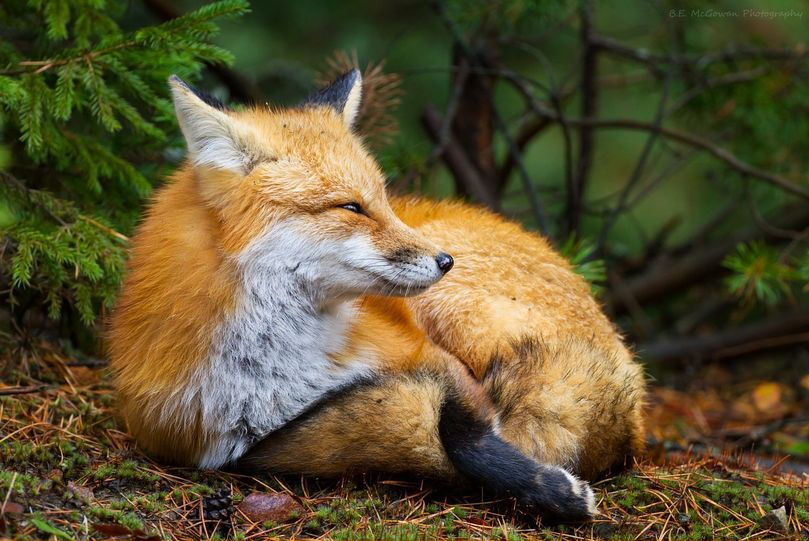

In [163]:
img_color = Image.open('data\Foxes.jpg')
display(img_color)

In [164]:
img_color.getpixel((150,150))

(42, 52, 17)

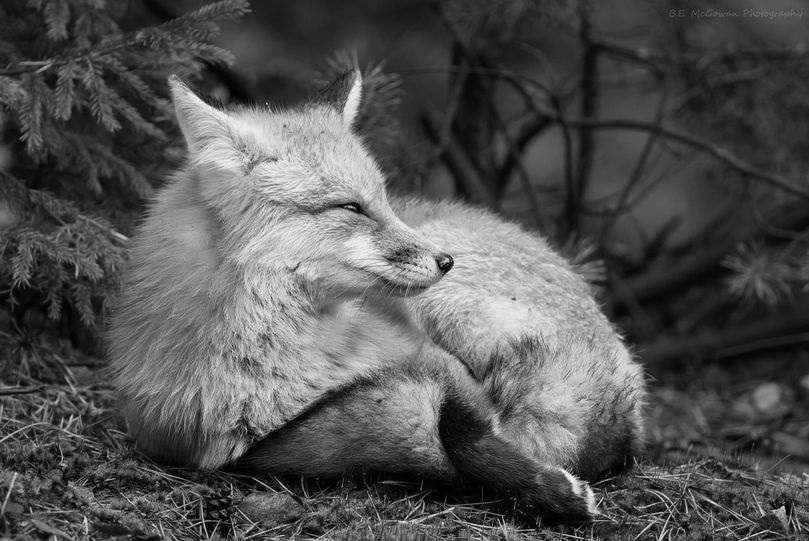

In [165]:
img_gray = Image.open('data\Foxes.jpg').convert('L')
display(img_gray)

In [166]:
img_gray.getpixel((150,150))

45

### 2. Нанести на изображение шум вида "salt and pepper". Вывести изображение на экран.

In [167]:
# считываем картинку как массив из пикселей
#mass_color = np.copy(np.array(img2))
mass_gray = np.copy(np.array(img_gray))

In [168]:
# mass_color

In [170]:
#mass_gray

In [171]:
#mass_gray.shape

In [172]:
#mass_gray.size

In [173]:
width, height = img_gray.size
#print(width, height)

In [174]:
mass_gray_noise = mass_gray.copy()

per_solt = 0.5  # процент шума белого
per_pepper = 0.01  # процент шума черного


count_solt = int((mass_gray.size/100)*per_solt)
count_pepper = int((mass_gray.size/100)*per_pepper)

points1 = [np.random.randint(0, height - 1, count_solt)]
points2 = [np.random.randint(0, width - 1, count_solt)]
 
points3 = [np.random.randint(0, height - 1, count_pepper)]
points4 = [np.random.randint(0, width - 1, count_pepper)]
 

mass_gray_noise[[points1],[points2]] = 255
mass_gray_noise[[points3],[points4]] = 0


#mass_gray_noise

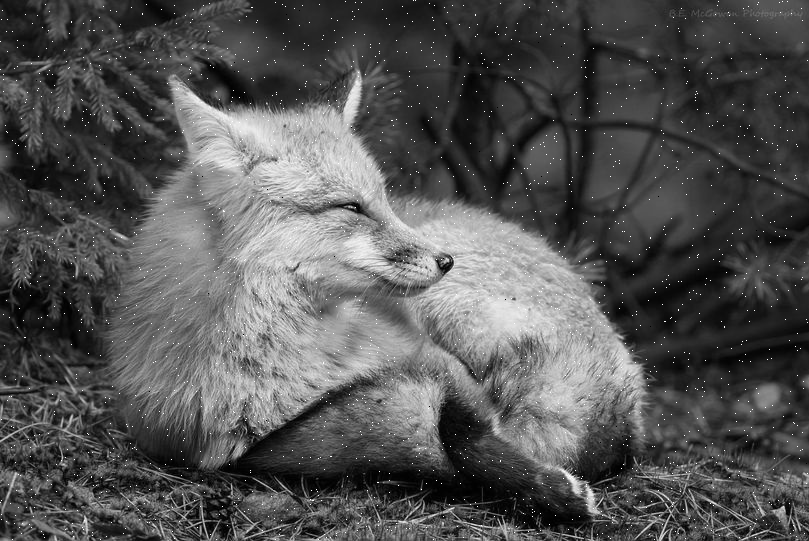

In [176]:
img_noise = Image.fromarray(mass_gray_noise)
display(img_noise)

### 3. Удалить шум с использованием морфологических операций дилатация и эрозия. Методы реализовать самостоятельно:

#### 3.1. Бинаризовать изображение пороговой фильтрацией. Порог подобрать эмпирически.

In [177]:
width_noise, height_noise = img_noise.size
print(width_noise, height_noise)

809 541


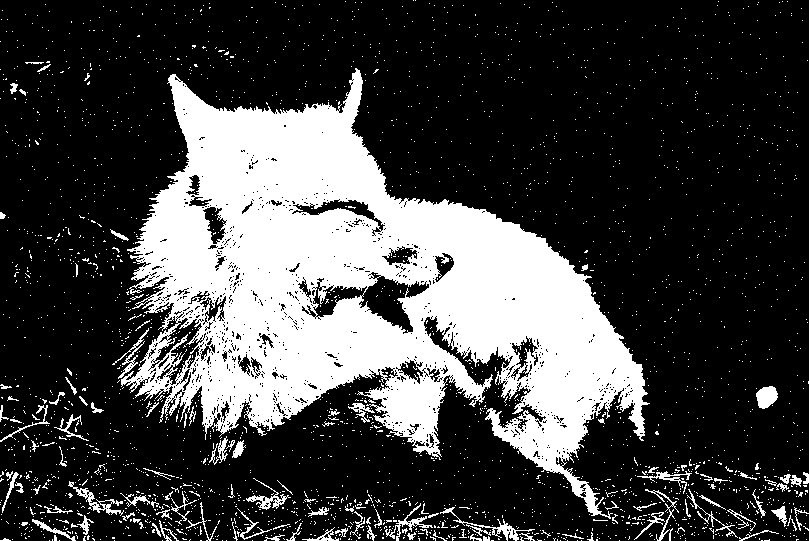

In [178]:
img_binar = img_noise.copy()

threshold = 115
for x in range(width_noise):
    for y in range(height_noise):
        if img_noise.getpixel((x,y)) < threshold:
            img_binar.putpixel((x,y), 0)
        else: 
            img_binar.putpixel((x,y), 255)

display(img_binar)

#### 3.2. Выбрать необходимые морфологические операции, применить их. Оценить на бинарном изображении качество фильтрации от шума.

3.2.1. эрозия

In [179]:
img_er = img_binar.copy()

In [180]:
# убираем пиксель, если он на внутренней границе

def erode(Img, x, y):
    neighbour1 = Img.getpixel((x-1,y))
    neighbour2 = Img.getpixel((x,y-1))
    neighbour3 = Img.getpixel((x+1,y))
    neighbour4 = Img.getpixel((x,y+1))
    return neighbour1==0 or neighbour2==0 or neighbour3==0 or neighbour4==0 # true усли хотябы один из соседей ноль

In [181]:
for x in range(width-2):
    for y in range(height-2):
        if erode(img_binar, x+1, y+1):
            img_er.putpixel((x+1,y+1), 0)
               

In [229]:
#display(img_er)

3.2.2. дилатация

In [183]:
def dilocate(Img, x, y):
    neighbour1 = Img.getpixel((x-1,y))
    neighbour2 = Img.getpixel((x,y-1))
    neighbour3 = Img.getpixel((x+1,y))
    neighbour4 = Img.getpixel((x,y+1))
    return neighbour1 or neighbour2 or neighbour3 or neighbour4

In [184]:
img_dil = img_er.copy()
img_dil1 = img_er.copy()

In [185]:
for x in range(width-2):
    for y in range(height-2):
        if dilocate(img_dil1, x+1, y+1):
            img_dil.putpixel((x+1,y+1), 255)            

In [228]:
#display(img_dil)

3.2.3. Оценить на бинарном изображении качество фильтрации от шума

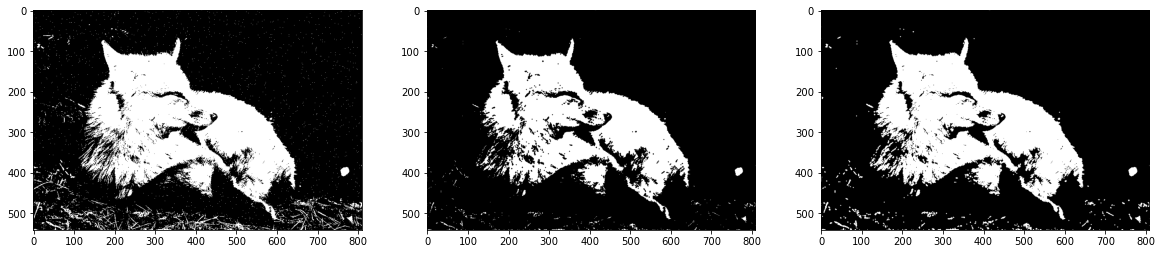

In [227]:
plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1)
plt.imshow(img_binar, cmap=plt.cm.gist_gray)
plt.subplot(1, 3, 2)
plt.imshow(img_er, cmap=plt.cm.gist_gray)
plt.subplot(1, 3, 3)
plt.imshow(img_dil, cmap=plt.cm.gist_gray)

#### 3.3. Получить маску шума. Для этого следует найти разницу бинарных изображений

In [188]:
from PIL import ImageChops
img_diff = ImageChops.difference(img_binar, img_dil)

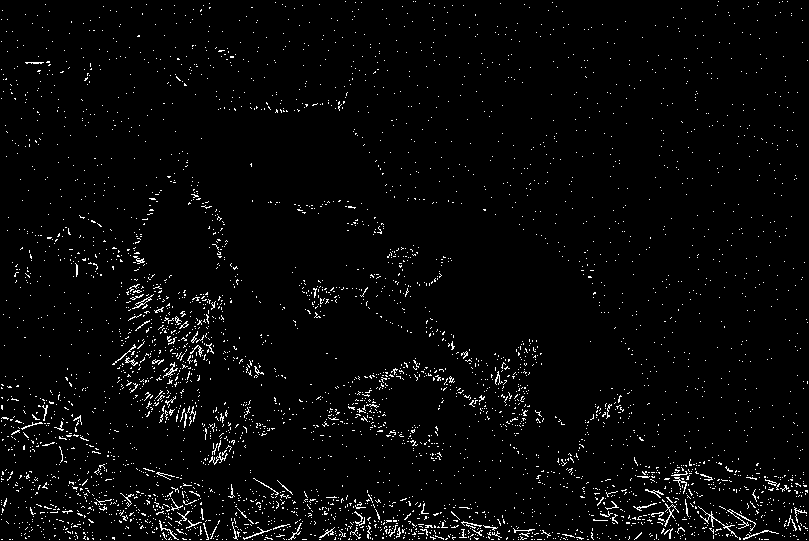

In [189]:
display(img_diff)

#### 3.4. В соответствие с маской шума поменять значения пикселей на исходном изображении на среднее значение соседних пикселей

In [190]:
mass_mask = np.copy(np.array(img_diff))
mass_mask

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0, 255, 255, ..., 255,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [191]:
mass_gray

array([[ 14,  15,  18, ...,  67,  66,  64],
       [ 15,  16,  18, ...,  69,  68,  65],
       [ 19,  19,  19, ...,  71,  70,  67],
       ...,
       [ 81,  87,  97, ...,  67, 110,  41],
       [ 97, 101, 110, ..., 116,  80,  34],
       [115, 117, 124, ...,  69,  33,  47]], dtype=uint8)

In [192]:
print(width, height)
mass_mask.shape

809 541


(541, 809)

In [193]:
#print(len(mass_gray[0]))

In [194]:
#mass_gray[0]

In [212]:
import statistics

def neighbor (img, x, y):
    neighbors = []
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            neighbors.append(img.getpixel((x+i,y+j)))
    return round(statistics.mean(neighbors))

In [213]:
print(neighbor(img_gray_mask, width-2, height-2))

62


In [202]:
img_gray_mask = img_noise.copy()

In [214]:
count = 0
for i in range (height):
    for j in range (width):
        if mass_mask [i][j] != 0:
            count +=1
            img_gray_mask.putpixel((j, i), neighbor(img_gray_mask, x, y))
            
#print (count)  

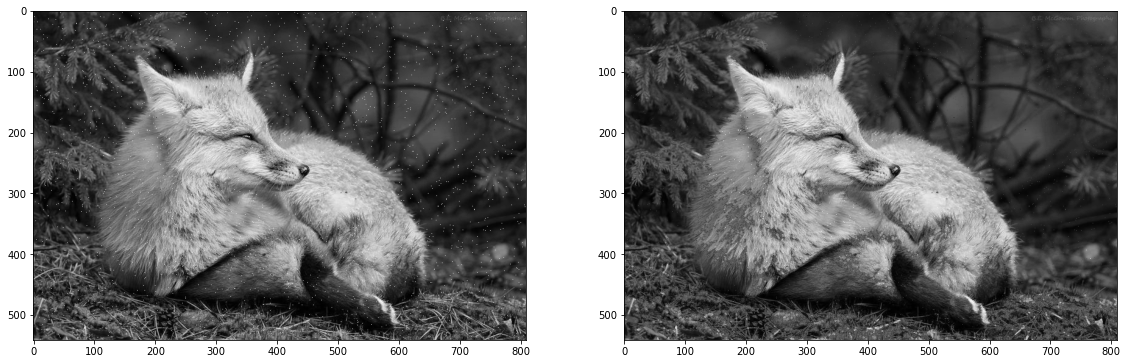

In [239]:
plt.figure(figsize=(30,30))
plt.subplot(1, 3, 1)
plt.imshow(img_noise, cmap=plt.cm.gist_gray)
plt.subplot(1, 3, 2)
plt.imshow(img_gray_mask, cmap=plt.cm.gist_gray)


### 4. Удалить шум с оригинального изображения шум при помощи медианной фильтрации. Метод реализовать самостоятельно. Вывести изображение на экран

In [223]:
def medianFilter(img, x, y):
    neighbors = []
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            neighbors.append(img.getpixel((x+i,y+j)))
            neighbors.sort()
    return neighbors[len(neighbors)//2]

In [224]:
img_median = img_noise.copy()
mass_median = np.copy(np.array(img_noise))

In [225]:
for i in range (height):
    for j in range (width):
        if (mass_median[i][j] == 0) or (mass_median[i][j] == 255):
            img_median.putpixel((j, i), medianFilter(img_median, x, y))

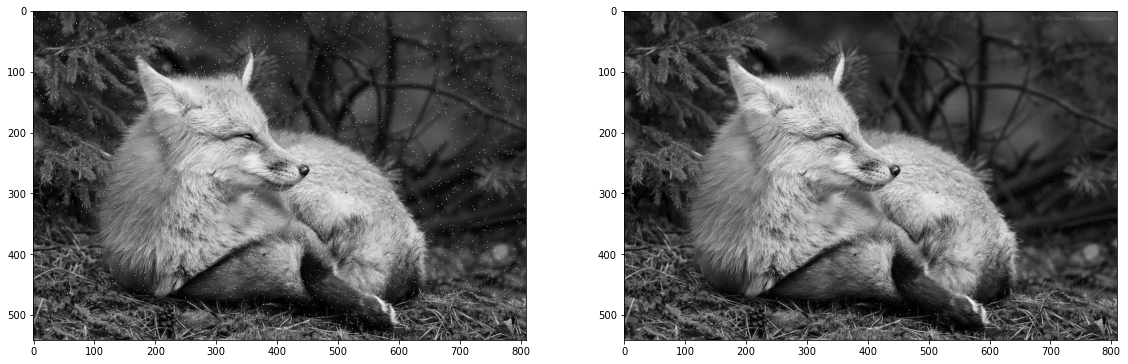

In [238]:
plt.figure(figsize=(30,30))
plt.subplot(1, 3, 1)
plt.imshow(img_noise, cmap=plt.cm.gist_gray)
plt.subplot(1, 3, 2)
plt.imshow(img_median, cmap=plt.cm.gist_gray)
